# FINAL CAPSTONE PROJECT

- Dalam proyek praktik ini, kita akan melatih model XG-Boost untuk memprediksi harapan hidup.
- Data diperoleh dari Organisasi Kesehatan Dunia (WHO) dan Situs PBB dan berisi fitur-fitur seperti tahun, status, harapan hidup, kematian orang dewasa, kematian bayi, persentase pengeluaran, alkohol, dll.




> 1.   Impor data “Life_Expectancy_Data.csv” dengan Pandas
2. Periksa apakah ada missing value pada data, lakukan rekayasa fitur untuk menghilangkan atau mengisi missing value
3. Berapa banyak memori yang terpakai dari DataFrame tersebut
4. Hitung nilai minimum, rata-rata dan maksimum dari life expectancy
5. Plot histogram, pairplot dan heatmap dari matriks korelasi untuk semua fitur
6. Plot scatterplot antara “Income composition of resources” dan “life expectancy”, gunakan “status” sebagai atribut hue. Berikan komentar pada plot yang dibentuk.
7. Plot scatterplot antara “Schooling” dan “life expectancy”, gunakan “status” sebagai atribut hue. Berikan komentar pada plot yang dibentuk.
8. Bagi data menjadi 80% data latih dan 20% data testing
9. Latih model XG-boost
10. Evaluasi model regresi yang telah dilatih, apa itu R2?
11. Plot prediksi dari model yang dilatih vs keluaran sebenarnya (ground-truth)

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
life_df = pd.read_csv('Life_Expectancy_Data.csv')

In [15]:
life_df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [16]:
life_df2 = life_df.dropna()

In [17]:
life_df2.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
life_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Status                           1649 non-null   object 
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9    BMI                             1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure        

In [19]:
life_df2['Life expectancy '].max()

89.0

In [20]:
life_df2['Life expectancy '].min()

44.0

In [21]:
life_df2['Life expectancy '].mean()

69.3023044269254

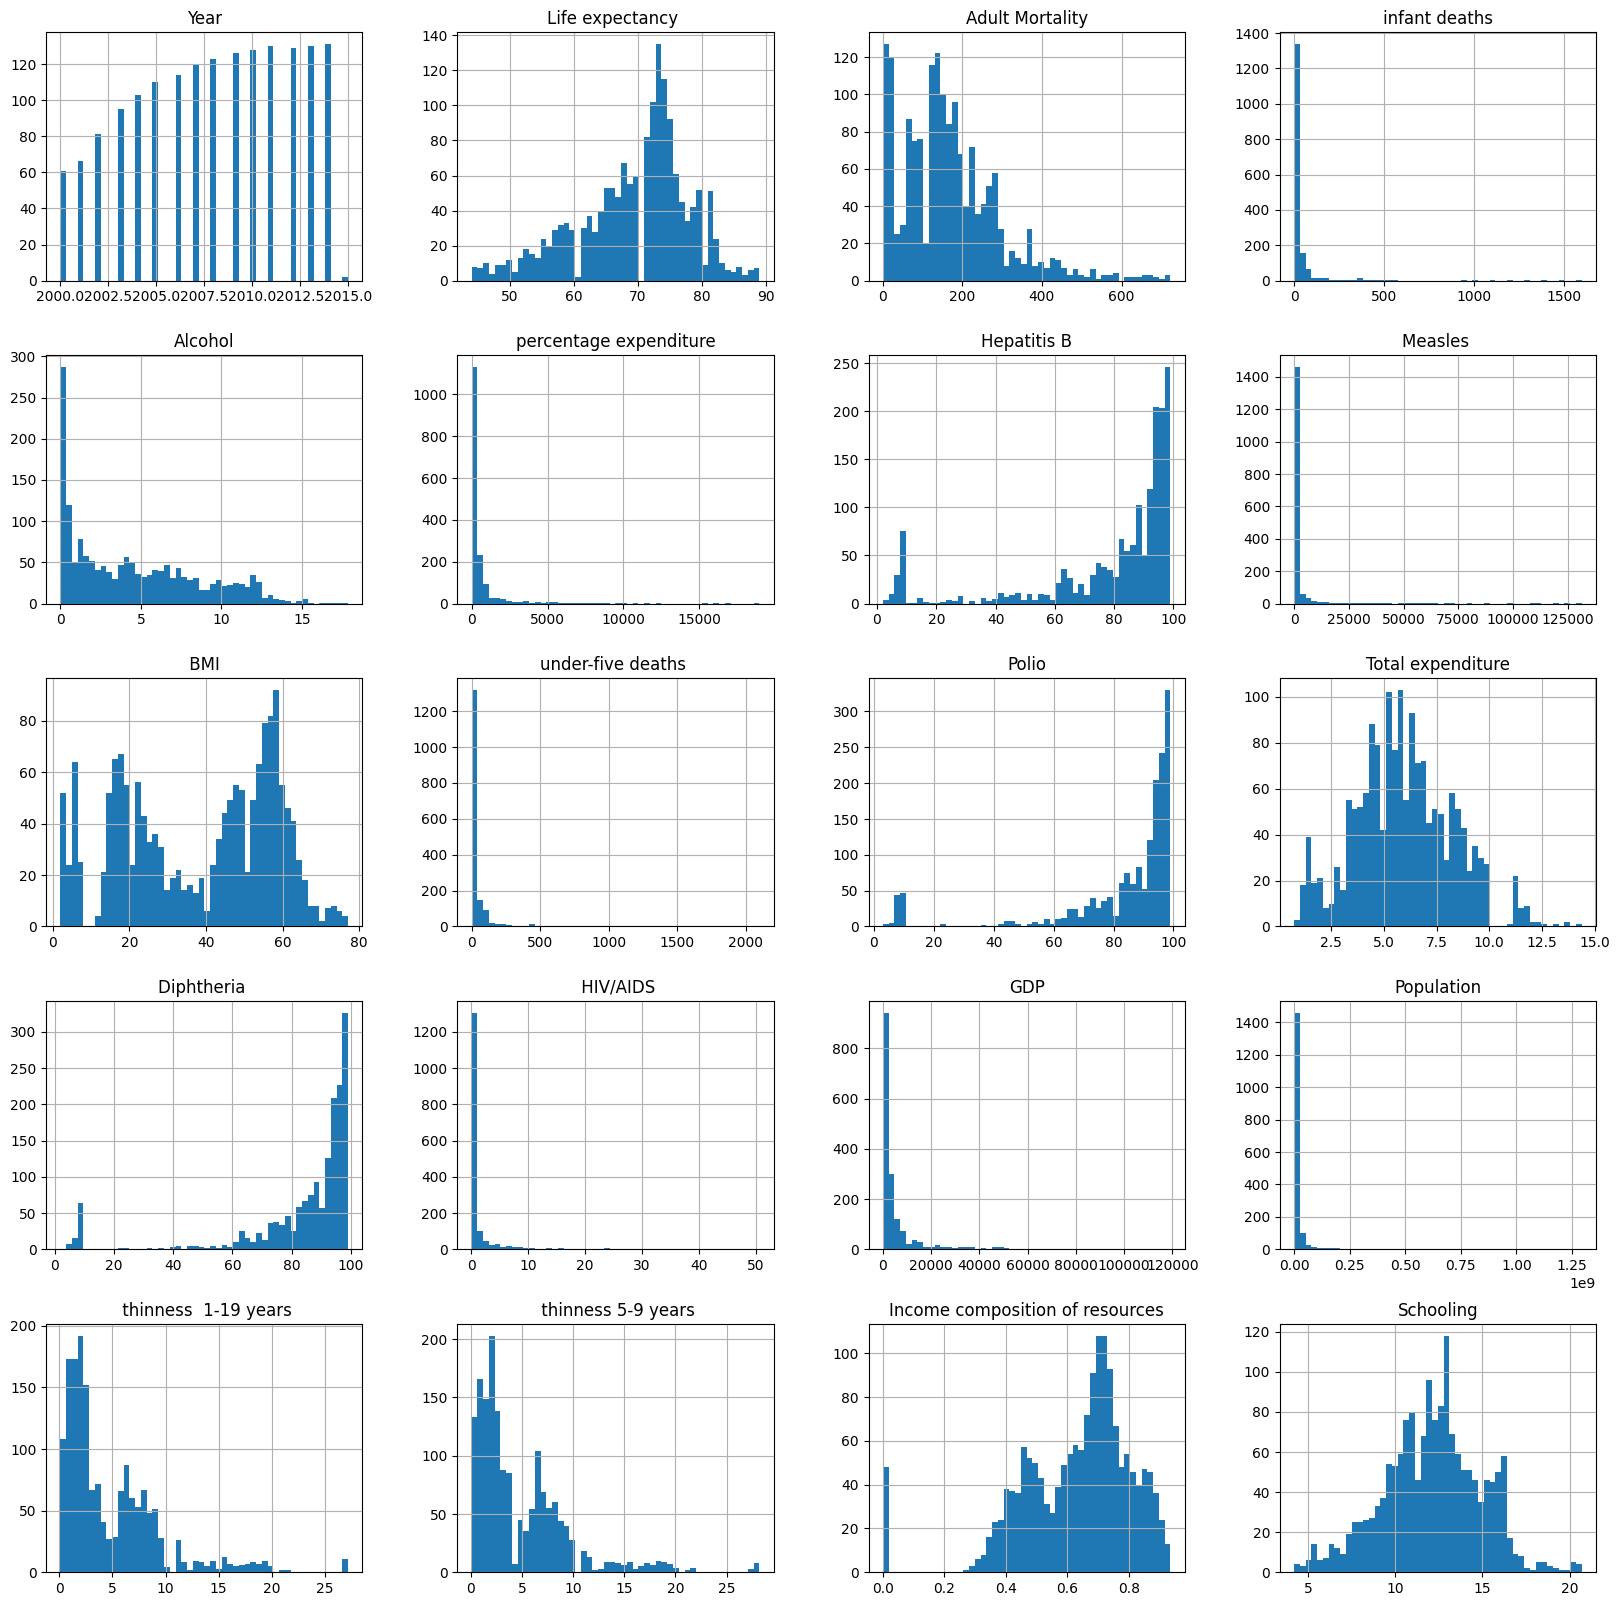

In [22]:
# plt.figure(figsize=(20,20))s
life_df2.hist(bins=50, figsize=(20,20))
plt.show()

In [29]:
# sns.pairplot(life_df2)
# plt.show()

In [45]:
life_df2.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


<Axes: >

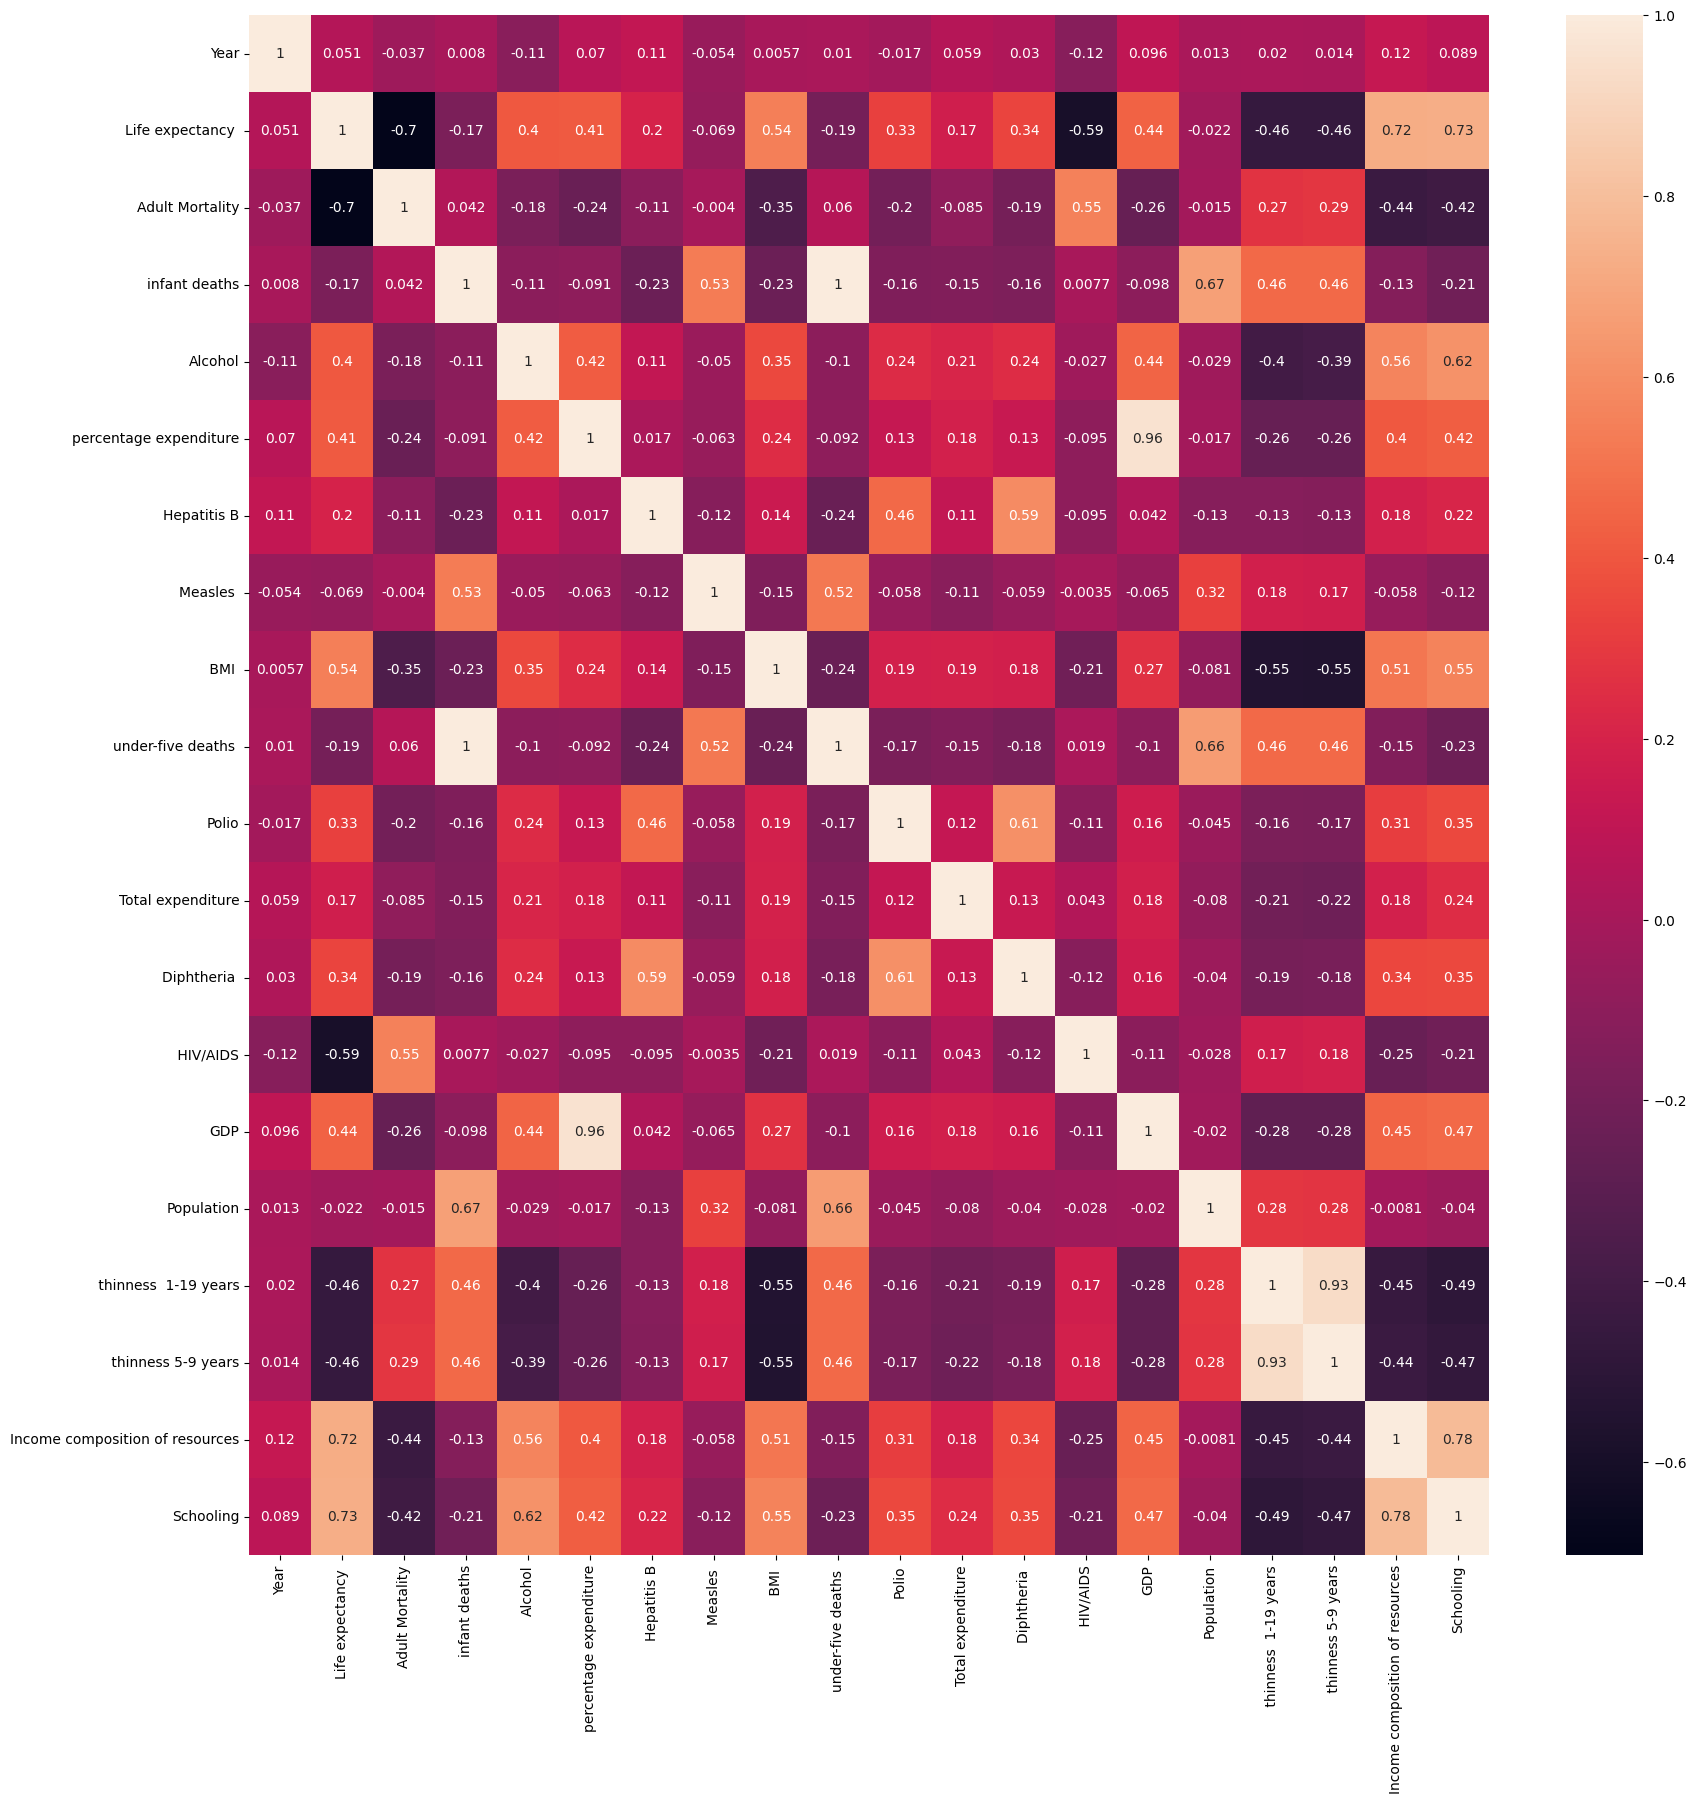

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(life_df2.corr(), annot = True)

In [52]:
life_df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

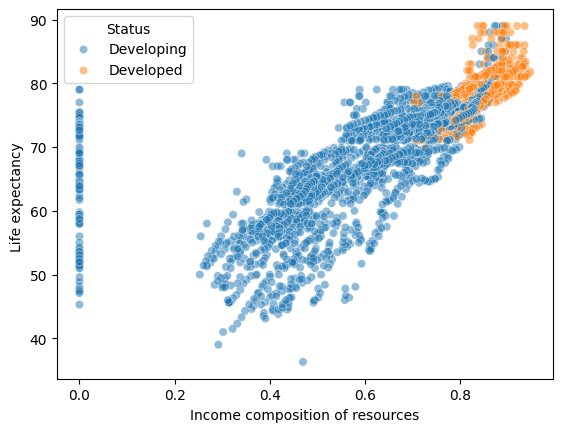

In [61]:
sns.scatterplot(x ='Income composition of resources', y='Life expectancy ', hue='Status', alpha = 0.5, data=life_df)
plt.show()

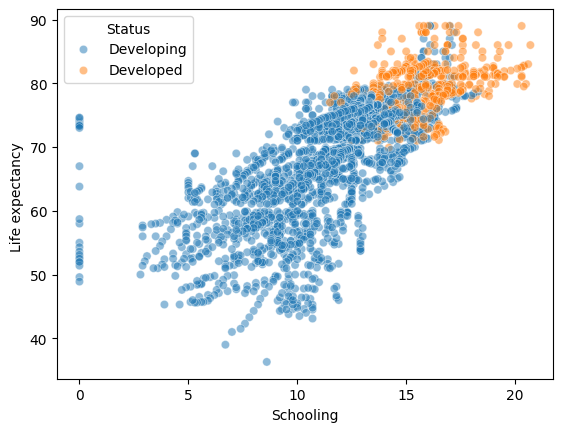

In [62]:
sns.scatterplot(x ='Schooling', y='Life expectancy ', hue='Status', alpha = 0.5, data=life_df)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
life_df2.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [69]:
life_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria               

In [73]:
X = life_df2.drop(columns=['Life expectancy '])

In [74]:
y = life_df2['Life expectancy ']

In [75]:
X.shape

(1649, 19)

In [76]:
y.shape

(1649,)

In [77]:
X = np.array(X)
y = np.array(y)

In [80]:
y = y.reshape(-1,1)

In [81]:
y.shape

(1649, 1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [84]:
X_train.shape

(1319, 19)

In [86]:
X_test.shape

(330, 19)

In [85]:
y_train.shape

(1319, 1)

In [87]:
y_test.shape

(330, 1)

In [88]:
!pip install xgboost

In [89]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [91]:
model.score(X_test, y_test)

0.9405115978232569

In [95]:
y_predict = model.predict(X_test)
y_predict

array([60.038383, 81.80574 , 75.29209 , 53.100655, 64.25743 , 80.127625,
       51.53877 , 55.695633, 48.17951 , 73.681786, 81.42267 , 73.883125,
       79.1772  , 73.21604 , 81.08935 , 51.591686, 52.12157 , 72.9015  ,
       72.93255 , 68.92449 , 77.93942 , 65.82495 , 65.066086, 73.06139 ,
       73.70144 , 66.88648 , 65.0939  , 57.762955, 80.006775, 71.37269 ,
       71.55293 , 50.989487, 59.635487, 70.11377 , 74.25845 , 71.43095 ,
       75.73187 , 81.825424, 81.08731 , 55.98042 , 76.76178 , 65.74226 ,
       81.48228 , 67.92013 , 82.76096 , 82.23607 , 51.569824, 74.6942  ,
       72.25836 , 81.97496 , 60.839916, 70.94349 , 59.301018, 81.10939 ,
       68.55446 , 81.87438 , 75.29864 , 78.588425, 68.54856 , 66.753334,
       72.93255 , 72.65823 , 68.66612 , 76.56913 , 76.19477 , 81.881386,
       72.87777 , 71.37372 , 72.988884, 74.13646 , 68.43472 , 81.81454 ,
       46.90968 , 81.34949 , 81.068184, 54.84374 , 75.81672 , 81.0613  ,
       64.789856, 67.83929 , 60.77602 , 76.579414, 

In [96]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 2.267 
MSE = 5.140228127334427 
MAE = 1.675479368730025 
R2 = 0.9405115978232569


<function matplotlib.pyplot.show(close=None, block=None)>

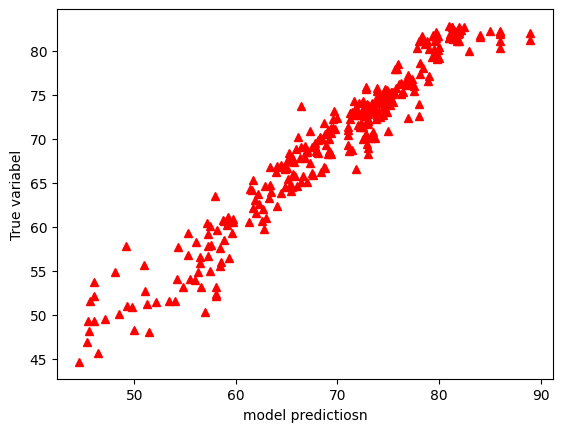

In [97]:
plt.plot(y_test, y_predict, '^', color = "r")
plt.xlabel('model predictiosn')
plt.ylabel('True variabel')
plt.show